# How to Run File

In order to run the file all you need is to put the glove.6B.100d.txt in the same folder as this file and run the notebook from top to bottom all the data set are uploaded online and loaded directly from our github repository so there is no need for anything else.

# Importing all the libraries

In [1]:
import pandas as pd
import numpy as np
import os
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters
from nltk.tokenize.simple import TabTokenizer
from os.path import isfile, join
from sklearn.naive_bayes import MultinomialNB
from gensim.models import Word2Vec,KeyedVectors
import requests
from imblearn.over_sampling import RandomOverSampler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score
from tensorflow import keras
import tensorflow as tf
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Flatten
from keras.initializers import Constant
from sklearn.metrics.pairwise import cosine_similarity
import random
from sklearn.utils import class_weight
import warnings
from numpy import array
from numpy import asarray
from numpy import zeros

# tf.config.run_functions_eagerly(True)

random.seed(10)
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# Importing the data set and all the lexicons

In [ ]:
EmotionDataTrain = pd.read_csv('https://github.com/Arnobiuspk/DataSetHw4/blob/main/train.txt?raw=true',sep=';',header=None, names=['Sentence','Emotion'])
EmotionDataTest = pd.read_csv('https://github.com/Arnobiuspk/DataSetHw4/blob/main/test.txt?raw=true',sep=';',header=None, names=['Sentence','Emotion'])
EmotionDataValidate = pd.read_csv('https://github.com/Arnobiuspk/DataSetHw4/blob/main/val.txt?raw=true',sep=';',header=None, names=['Sentence','Emotion'])
TempData = [EmotionDataTrain,EmotionDataTest,EmotionDataValidate]
EmotionData = pd.concat(TempData)

In [ ]:
AngerLexicon = pd.read_csv('https://github.com/Arnobiuspk/DataSetHw4/blob/main/anger.txt?raw=true',sep='\t',header=None, names=['word','Inlexicon'])
fearlexicon = pd.read_csv('https://github.com/Arnobiuspk/DataSetHw4/blob/main/fear.txt?raw=true',sep='\t',header=None, names=['word','Inlexicon'])
joylexicon = pd.read_csv('https://github.com/Arnobiuspk/DataSetHw4/blob/main/joy.txt?raw=true',sep='\t',header=None, names=['word','Inlexicon'])
positivelexicon = pd.read_csv('https://github.com/Arnobiuspk/DataSetHw4/blob/main/positive.txt?raw=true',sep='\t',header=None, names=['word','Inlexicon'])
sadnesslexicon = pd.read_csv('https://github.com/Arnobiuspk/DataSetHw4/blob/main/sadness.txt?raw=true',sep='\t',header=None, names=['word','Inlexicon'])
surpriselexicon = pd.read_csv('https://github.com/Arnobiuspk/DataSetHw4/blob/main/surprise.txt?raw=true',sep='\t',header=None, names=['word','Inlexicon'])
negativelexicon = pd.read_csv('https://github.com/Arnobiuspk/DataSetHw4/blob/main/negative.txt?raw=true',sep='\t',header=None, names=['word','Inlexicon'])

# Importing the Glove Embeddings

In [ ]:
def load_embeddings(filename):
    """
    Load a DataFrame from the generalized text format used by word2vec, GloVe,
    fastText, and ConceptNet Numberbatch. The main point where they differ is
    whether there is an initial line with the dimensions of the matrix.
    """
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        for i, line in enumerate(infile):
            items = line.rstrip().split(' ')
            if len(items) == 2:
                # This is a header row giving the shape of the matrix
                continue
            labels.append(items[0])
            values = np.array([float(x) for x in items[1:]], 'f')
            rows.append(values)
    
    arr = np.vstack(rows)
    return pd.DataFrame(arr, index=labels, dtype='f')

# embeddings = load_embeddings('glove.6B.50d.txt')
# embeddings.shape

(400000, 50)

In [ ]:
embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
embeddings_dictionary['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

# Data Preprocessing and Analysis

In [ ]:
def convertolist(lexicondf):
  lexicondf = lexicondf[lexicondf['Inlexicon'] == 1]
  lexicondf.drop('Inlexicon', inplace=True, axis=1)
  return lexicondf['word'].tolist()

AngerLexicon = convertolist(AngerLexicon)
fearlexicon = convertolist(fearlexicon)
joylexicon = convertolist(joylexicon)
positivelexicon = convertolist(positivelexicon)
sadnesslexicon = convertolist(sadnesslexicon)
surpriselexicon = convertolist(surpriselexicon)
negativelexicon = convertolist(negativelexicon)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
EmotionData

,Sentence,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [ ]:
max_text_len = 0
for index, row in EmotionData.iterrows():
    max_text_len = max(max_text_len, len(row['Sentence'].split()))

In [ ]:
max_text_len

66

Distribution of Labels in the Dataset

Emotion 
joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
dtype: int64


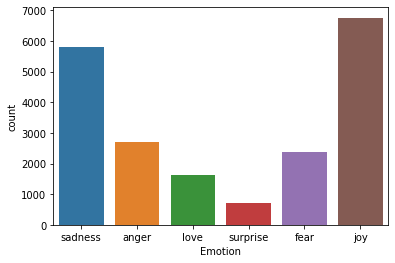

In [ ]:
print(EmotionData[['Emotion']].value_counts())
sns.countplot(x='Emotion',data=EmotionData)

if length of the sentence is correlated to the emotion

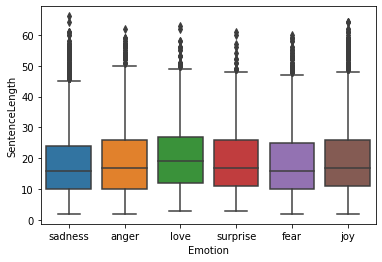

In [ ]:

EmotionData['SentenceLength'] = EmotionData['Sentence'].apply(lambda x: len(x.split()))
sns.boxplot(x='Emotion',y='SentenceLength',data=EmotionData)

In [ ]:
factor = pd.factorize(EmotionData['Emotion'])
EmotionData.Emotion = factor[0]
Ydata = factor[0]
definitions = factor[1]

In [ ]:
reversefactor = dict(zip(range(6),definitions))

Adding lexicon data

In [ ]:
# listoftotalcounts = []
# for i in EmotionData['Sentence']:
#   alllexiconscounts = []
#   noofpositivecounts = 0
#   noofnegativecounts = 0
#   noofangercounts = 0
#   nooffearcounts = 0
#   noofjoycounts = 0
#   noofsadnesscounts = 0
#   noofsurprisecounts = 0

#   for j in i.split(' '):
#     if j in negativelexicon:
#       noofnegativecounts += 1
#     if j in positivelexicon:
#       noofpositivecounts += 1
#     if j in AngerLexicon:
#       noofangercounts += 1
#     if j in fearlexicon:
#       nooffearcounts += 1
#     if j in joylexicon:
#       noofjoycounts += 1
#     if j in sadnesslexicon:
#       noofsadnesscounts += 1
#     if j in surpriselexicon:
#       noofsurprisecounts += 1          

#   alllexiconscounts.append(noofpositivecounts)
#   alllexiconscounts.append(noofnegativecounts)
#   alllexiconscounts.append(noofangercounts)
#   alllexiconscounts.append(nooffearcounts)
#   alllexiconscounts.append(noofjoycounts)
#   alllexiconscounts.append(noofsadnesscounts)
#   alllexiconscounts.append(noofsurprisecounts)
#   listoftotalcounts.append(alllexiconscounts)

In [ ]:
# listoftotalcounts = np.array(listoftotalcounts)

In [ ]:
# listoftotalcounts.shape

(20000, 2)

In [ ]:
Xdata = EmotionData[["Sentence"]].to_numpy()
Xdata = Xdata.flatten()
Xdata.shape
Xdata = Xdata.reshape(len(Xdata),1)

In [ ]:
Xdata.shape

(20000, 1)

In [ ]:
# Xdata = np.concatenate((Xdata, listoftotalcounts), axis=1)

Splitting the Data into validaiton and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, EmotionData['Emotion'], test_size=0.1, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11, random_state=42)

Doing over sampling on the Train data only

In [ ]:
X_traindataframe = pd.DataFrame(X_train,columns=["Sentence"])

In [ ]:
X_traindataframe

,Sentence
0,i feel as though my descriptions are skimmable...
1,i like to feel that is exactly what i do for m...
2,i feel that im most amazed still by silent kni...
3,i suppose i felt odd and different too and lik...
4,i had written a prayer in my journal that morn...
...,...
16015,i find that i have so much to blog whenever i ...
16016,i am also noticing that i can only handle so m...
16017,i had no idea i was giving off this vibe but i...
16018,i feel depressed or even short tempered some days


In [ ]:
ros = RandomOverSampler(random_state=0)
X_trainresampled, y_trainresampled = ros.fit_resample(X_traindataframe,y_train)

In [ ]:
X_trainresampled = X_trainresampled.to_numpy()

Converting the XTrain input into binarized bag of words

In [ ]:
vectorizer = CountVectorizer(stop_words='english',binary=True)
#vectorizer = CountVectorizer(stop_words='english')

In [ ]:
vectorizer.fit(X_trainresampled[:,0])
bagtrain = vectorizer.transform(X_trainresampled[:,0])

In [ ]:
# X_trainresampled = np.concatenate((bagtrain.toarray(), X_trainresampled[:,1:]), axis=1)
X_trainresampled = bagtrain.toarray()

In [ ]:
X_trainresampled.shape

(32298, 14815)

Converting the X_Val and X_test into binarized bag of words and y_test and y_val back to string values

In [ ]:
X_val.shape

(1980, 1)

In [ ]:
sentencesval = X_val[:,0]
bagval = vectorizer.transform(sentencesval)
# X_val = np.concatenate((bagval.toarray(), X_val[:,1:]), axis=1)
X_valBinarized = bagval.toarray()

In [ ]:
X_valBinarized.shape

(1980, 14815)

In [ ]:
sentencestest = X_test[:,0]
bagtest = vectorizer.transform(sentencestest)
X_testBinarized = np.concatenate((bagtest.toarray(), X_test[:,1:]), axis=1)

In [ ]:
X_testBinarized.shape

(2000, 14815)

In [ ]:
y_valconverted = np.vectorize(reversefactor.get)(y_val)
y_testconverted = np.vectorize(reversefactor.get)(y_test)

# Training the Model Random Forest

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_trainresampled, y_trainresampled)

RandomForestClassifier(criterion='entropy', random_state=42)

Random Forest Model Result on Validation Set

In [ ]:
y_pred_val = classifier.predict(X_valBinarized)

In [ ]:
y_pred_val = np.vectorize(reversefactor.get)(y_pred_val)

In [ ]:
print(classification_report(y_valconverted, y_pred_val))

              precision    recall  f1-score   support

       anger       0.81      0.92      0.86       227
        fear       0.84      0.80      0.82       232
         joy       0.94      0.83      0.88       703
        love       0.70      0.85      0.77       168
     sadness       0.89      0.90      0.89       577
    surprise       0.66      0.84      0.73        73

    accuracy                           0.86      1980
   macro avg       0.80      0.86      0.83      1980
weighted avg       0.87      0.86      0.86      1980



In [ ]:
confusion_matrix(y_valconverted, y_pred_val)

array([[209,   5,   2,   2,   8,   1],
       [ 15, 185,   3,   3,  12,  14],
       [ 15,   5, 581,  49,  43,  10],
       [  1,   1,  19, 143,   4,   0],
       [ 19,  13,  11,   8, 519,   7],
       [  0,  11,   1,   0,   0,  61]])

Random Forest Model Result on Test Set

In [ ]:
y_pred_test = classifier.predict(X_testBinarized)

In [ ]:
y_pred_test = np.vectorize(reversefactor.get)(y_pred_test)

In [ ]:
print(classification_report(y_testconverted, y_pred_test))

              precision    recall  f1-score   support

       anger       0.84      0.91      0.88       261
        fear       0.82      0.80      0.81       231
         joy       0.93      0.85      0.89       675
        love       0.73      0.90      0.81       161
     sadness       0.89      0.89      0.89       584
    surprise       0.75      0.83      0.79        88

    accuracy                           0.87      2000
   macro avg       0.83      0.86      0.84      2000
weighted avg       0.87      0.87      0.87      2000



# Traning the Model Naive Bayes

In [ ]:
clfnb = MultinomialNB()
clfnb.fit(X_trainresampled, y_trainresampled)

MultinomialNB()

Naive Bayes Model Result on Validation Set

In [ ]:
y_pred_nbval = clfnb.predict(X_valBinarized)
y_pred_nbval = np.vectorize(reversefactor.get)(y_pred_nbval)
print(classification_report(y_valconverted, y_pred_nbval))

              precision    recall  f1-score   support

       anger       0.73      0.84      0.78       227
        fear       0.76      0.78      0.77       232
         joy       0.90      0.82      0.85       703
        love       0.63      0.72      0.67       168
     sadness       0.89      0.85      0.87       577
    surprise       0.50      0.68      0.57        73

    accuracy                           0.81      1980
   macro avg       0.74      0.78      0.76      1980
weighted avg       0.82      0.81      0.82      1980



Naive Bayes Model Result on Test Set

In [ ]:
y_pred_nbtest = clfnb.predict(X_testBinarized)
y_pred_nbtest = np.vectorize(reversefactor.get)(y_pred_nbtest)
print(classification_report(y_testconverted, y_pred_nbtest))

              precision    recall  f1-score   support

       anger       0.80      0.84      0.82       261
        fear       0.72      0.79      0.76       231
         joy       0.90      0.81      0.85       675
        love       0.61      0.80      0.69       161
     sadness       0.89      0.84      0.86       584
    surprise       0.56      0.69      0.62        88

    accuracy                           0.81      2000
   macro avg       0.75      0.79      0.77      2000
weighted avg       0.83      0.81      0.82      2000



# Training the Model Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_trainresampled, y_trainresampled)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Logistic Regression Model Result on Validation Set

In [ ]:
y_pred_val_lr = logreg.predict(X_valBinarized)
y_pred_val_lr = np.vectorize(reversefactor.get)(y_pred_val_lr)

In [ ]:
print(classification_report(y_valconverted, y_pred_val_lr))

              precision    recall  f1-score   support

       anger       0.87      0.93      0.90       227
        fear       0.84      0.82      0.83       232
         joy       0.95      0.89      0.92       703
        love       0.75      0.88      0.81       168
     sadness       0.93      0.90      0.92       577
    surprise       0.68      0.92      0.78        73

    accuracy                           0.89      1980
   macro avg       0.84      0.89      0.86      1980
weighted avg       0.90      0.89      0.89      1980



Logistic Regression Model Result on Test Set

In [ ]:
y_pred_test_lr = logreg.predict(X_testBinarized)
y_pred_test_lr = np.vectorize(reversefactor.get)(y_pred_test_lr)

In [ ]:
print(classification_report(y_testconverted, y_pred_test_lr))

              precision    recall  f1-score   support

       anger       0.87      0.92      0.89       261
        fear       0.86      0.84      0.85       231
         joy       0.93      0.90      0.92       675
        love       0.77      0.89      0.82       161
     sadness       0.95      0.90      0.93       584
    surprise       0.73      0.89      0.80        88

    accuracy                           0.90      2000
   macro avg       0.85      0.89      0.87      2000
weighted avg       0.90      0.90      0.90      2000



# Neural Network Model

Tokenzing the input

In [ ]:
tokenizer = TreebankWordTokenizer()
def TokenizeTheInput(x,tokenizer):
  temp = []
  for i in range(len(x)):
    temptokens = tokenizer.tokenize(x.item(i))
    temp.append(temptokens)
  return temp

In [ ]:
X_traintokenized = TokenizeTheInput(X_train,tokenizer)
# X_traintokenized = TokenizeTheInput(X_trainresampled,tokenizer)
X_ValTokenized  =  TokenizeTheInput(X_val,tokenizer)
X_TestTokenzied  =  TokenizeTheInput(X_test,tokenizer)

Assigning Indexes to words

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_traintokenized)
X_trainIndex = tokenizer.texts_to_sequences(X_traintokenized)
X_ValIndex = tokenizer.texts_to_sequences(X_ValTokenized)
X_TestIndedx = tokenizer.texts_to_sequences(X_TestTokenzied)

Padding the input of all the sets

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
# maxlen = max_text_len
maxlen = 100
X_trainpadded = pad_sequences(X_trainIndex, padding='post', maxlen=maxlen)
X_Valpadded = pad_sequences(X_ValIndex, padding='post', maxlen=maxlen)
X_testpadded = pad_sequences(X_TestIndedx, padding='post', maxlen=maxlen)

In [ ]:
X_trainpadded.shape

(16020, 100)

In [ ]:
vocab_size

15134

Creating the Embedding Matrix

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(15134, 100)

Training the Normal Neural Network Model

In [ ]:
modelNN = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , embeddings_initializer = Constant(embedding_matrix))
modelNN.add(embedding_layer)
modelNN.add(Flatten())
# modelNN.add(Dense(units=128, activation='relu'))
# modelNN.add(Dense(units=64, activation='relu'))
modelNN.add(Dense(6, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
modelNN.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,metrics=["accuracy"])

historynormalNN = modelNN.fit(X_trainpadded, y_train,batch_size=16, epochs=10, verbose=1,validation_data = (X_Valpadded, y_val))

Epoch 1/10
1002/1002 [==============================] - 22s 21ms/step - loss: 1.3784 - accuracy: 0.4952 - val_loss: 1.1688 - val_accuracy: 0.5934
Epoch 2/10
1002/1002 [==============================] - 22s 22ms/step - loss: 0.6643 - accuracy: 0.7863 - val_loss: 0.7649 - val_accuracy: 0.7480
Epoch 3/10
1002/1002 [==============================] - 21s 21ms/step - loss: 0.2828 - accuracy: 0.9275 - val_loss: 0.6241 - val_accuracy: 0.7980
Epoch 4/10
1002/1002 [==============================] - 22s 22ms/step - loss: 0.1324 - accuracy: 0.9725 - val_loss: 0.6494 - val_accuracy: 0.7990
Epoch 5/10
1002/1002 [==============================] - 22s 22ms/step - loss: 0.0741 - accuracy: 0.9854 - val_loss: 0.5894 - val_accuracy: 0.8182
Epoch 6/10
1002/1002 [==============================] - 22s 22ms/step - loss: 0.0476 - accuracy: 0.9908 - val_loss: 0.5763 - val_accuracy: 0.8253
Epoch 7/10
1002/1002 [==============================] - 21s 21ms/step - loss: 0.0388 - accuracy: 0.9929 - val_loss: 0.6069 -

Result on Validation Set Normal Neural Network

In [ ]:
y_pred_val_nnnormal = modelNN.predict(X_Valpadded)
y_pred_val_nnnormal = np.argmax(y_pred_val_nnnormal, axis=1)
y_pred_val_nnnormal = np.vectorize(reversefactor.get)(y_pred_val_nnnormal)
print(classification_report(y_valconverted, y_pred_val_nnnormal))

62/62 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

       anger       0.80      0.78      0.79       227
        fear       0.84      0.74      0.79       232
         joy       0.86      0.88      0.87       703
        love       0.63      0.61      0.62       168
     sadness       0.85      0.90      0.88       577
    surprise       0.71      0.60      0.65        73

    accuracy                           0.83      1980
   macro avg       0.78      0.75      0.77      1980
weighted avg       0.82      0.83      0.82      1980



Results on Test Set Normal Neural Network

In [ ]:
y_pred_test_nnnormal = modelNN.predict(X_testpadded)
y_pred_test_nnnormal = np.argmax(y_pred_test_nnnormal, axis=1)
y_pred_test_nnnormal = np.vectorize(reversefactor.get)(y_pred_test_nnnormal)
print(classification_report(y_testconverted, y_pred_test_nnnormal))

63/63 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

       anger       0.84      0.78      0.81       261
        fear       0.77      0.74      0.75       231
         joy       0.87      0.89      0.88       675
        love       0.67      0.73      0.70       161
     sadness       0.86      0.90      0.88       584
    surprise       0.71      0.51      0.60        88

    accuracy                           0.83      2000
   macro avg       0.79      0.76      0.77      2000
weighted avg       0.83      0.83      0.83      2000



Training the LSTM Layer Neural Network

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , embeddings_initializer = Constant(embedding_matrix))
model.add(embedding_layer)
model.add(Bidirectional(LSTM(64, return_sequences = True)))
model.add(Bidirectional(LSTM(64, return_sequences = True)))
model.add(Bidirectional(LSTM(32,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=opt,metrics=["accuracy"])

In [ ]:
historyLstm = model.fit(X_trainpadded, y_train, validation_data = (X_Valpadded, y_val), epochs = 5,verbose=1)

Epoch 1/5
501/501 [==============================] - 194s 365ms/step - loss: 1.1981 - accuracy: 0.5296 - val_loss: 0.7247 - val_accuracy: 0.7253
Epoch 2/5
501/501 [==============================] - 177s 353ms/step - loss: 0.4428 - accuracy: 0.8449 - val_loss: 0.2692 - val_accuracy: 0.8980
Epoch 3/5
501/501 [==============================] - 174s 347ms/step - loss: 0.1858 - accuracy: 0.9295 - val_loss: 0.1790 - val_accuracy: 0.9222
Epoch 4/5
501/501 [==============================] - 174s 348ms/step - loss: 0.1200 - accuracy: 0.9462 - val_loss: 0.1964 - val_accuracy: 0.9141
Epoch 5/5
501/501 [==============================] - 173s 346ms/step - loss: 0.0900 - accuracy: 0.9564 - val_loss: 0.1847 - val_accuracy: 0.9202


Validation and Train Loss over the epochs

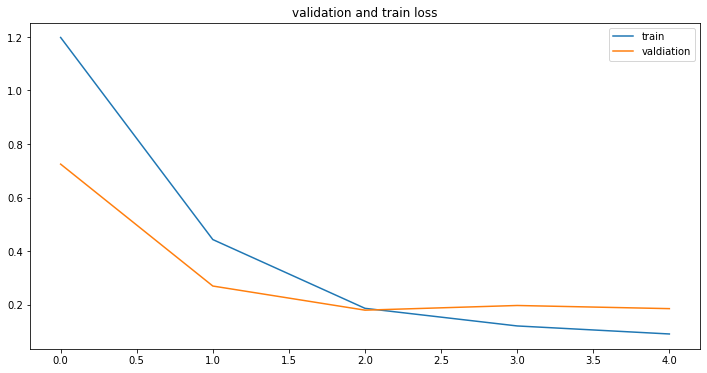

In [ ]:
train_loss = historyLstm.history['loss']
val_loss   = historyLstm.history['val_loss']
train_acc  = historyLstm.history['accuracy']
val_acc    = historyLstm.history['val_accuracy']
xc         = range(5)
plt.figure(figsize=(12, 6))
plt.plot(xc, train_loss, label="train")
plt.plot(xc, val_loss, label="valdiation")
plt.legend()
plt.title("validation and train loss")
plt.show()

Results on Validation set LSTM

In [ ]:
y_pred_val_lstm = model.predict(X_Valpadded)
y_pred_val_lstm = np.argmax(y_pred_val_lstm, axis=1)
y_pred_val_lstm = np.vectorize(reversefactor.get)(y_pred_val_lstm)
print(classification_report(y_valconverted, y_pred_val_lstm))

62/62 [==============================] - 7s 76ms/step
              precision    recall  f1-score   support

       anger       0.90      0.96      0.93       227
        fear       0.90      0.89      0.89       232
         joy       0.92      0.95      0.94       703
        love       0.79      0.77      0.78       168
     sadness       0.99      0.93      0.96       577
    surprise       0.77      0.88      0.82        73

    accuracy                           0.92      1980
   macro avg       0.88      0.90      0.89      1980
weighted avg       0.92      0.92      0.92      1980



Results on Test set LSTM

In [ ]:
y_pred_test_lstm = model.predict(X_testpadded)
y_pred_test_lstm = np.argmax(y_pred_test_lstm, axis=1)
y_pred_test_lstm = np.vectorize(reversefactor.get)(y_pred_test_lstm)
print(classification_report(y_testconverted, y_pred_test_lstm))

63/63 [==============================] - 5s 77ms/step
              precision    recall  f1-score   support

       anger       0.92      0.92      0.92       261
        fear       0.89      0.85      0.87       231
         joy       0.94      0.97      0.95       675
        love       0.84      0.83      0.83       161
     sadness       0.99      0.95      0.97       584
    surprise       0.79      0.91      0.85        88

    accuracy                           0.93      2000
   macro avg       0.89      0.90      0.90      2000
weighted avg       0.93      0.93      0.93      2000



# Works Cited

https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp

https://www.kaggle.com/code/aryan7781/emotions-classification-using-lstm

https://stackabuse.com/python-for-nlp-movie-sentiment-analysis-using-deep-learning-in-keras

https://www.codementor.io/@agarrahul01/multiclass-classification-using-random-forest-on-scikit-learn-library-hkk4lwawu

https://www.mygreatlearning.com/blog/bag-of-words/

https://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm